## 2. Baseline Model Training
Preprocess data, train on batch_0, evaluate F1/AUC.

In [1]:
# Setup (same as 01)
import os
import sys
project_root = r'c:\Users\anuda\Desktop\cell2cell_churn_drift'
os.chdir(project_root)
sys.path.insert(0, project_root)

from src.data.preprocessing import load_and_preprocess
from src.data.batch_generator import generate_batches
from src.model.train import train_model  # Assume src/model/train.py exists

df, scaler, le = load_and_preprocess()
batches = generate_batches(df, n_batches=5)
for i, batch in enumerate(batches):
    batch.to_csv(f"data/batches/batch_{i}.csv", index=False)
print("Batches generated.")

Raw shape: (51047, 58)
Raw Churn sample: [0, 0, 0, 1, 0]
Processed Churn distribution:
Churn
0    0.799988
1    0.200012
Name: proportion, dtype: float64
Using 12 numerics
MonthlyRevenue dtype after fix: float64
MonthlyMinutes dtype after fix: float64
TotalRecurringCharge dtype after fix: float64
DirectorAssistedCalls dtype after fix: float64
OverageMinutes dtype after fix: float64
RoamingCalls dtype after fix: float64
PercChangeMinutes dtype after fix: float64
PercChangeRevenues dtype after fix: float64
CustomerCareCalls dtype after fix: float64
MonthsInService dtype after fix: int64
HandsetPrice dtype after fix: int64
DroppedCalls dtype after fix: float64
Processed saved: data/processed/churn_processed.csv
Processed head (Churn + first few):
   Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge
0      0       -0.783096       -0.578622             -1.042504
1      0       -0.940828       -0.973610             -1.252478
2      0       -0.468083       -0.977390             -0.3

INFO:src.model.train:Baseline training on 8167 samples, churn rate: 12.62%


Baseline scale_pos_weight: 2.0


d:\anconda\envs\foml\Lib\site-packages\xgboost\callback.py:386: UserWarning: [22:19:27] WARNING: D:\bld\xgboost-split_1767713749021\work\src\learner.cc:790: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


Probs mean: 0.2098125


INFO:src.model.train:Baseline Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Baseline Best threshold: 0.3599999999999999
Baseline Best F1: 0.4230171073094868

Baseline Classification Report (Optimized Threshold):

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1784
           1       0.35      0.53      0.42       258

    accuracy                           0.82      2042
   macro avg       0.64      0.69      0.66      2042
weighted avg       0.85      0.82      0.83      2042

Baseline AUC: 0.7944802203914207
Baseline F1: 0.423, AUC: 0.794


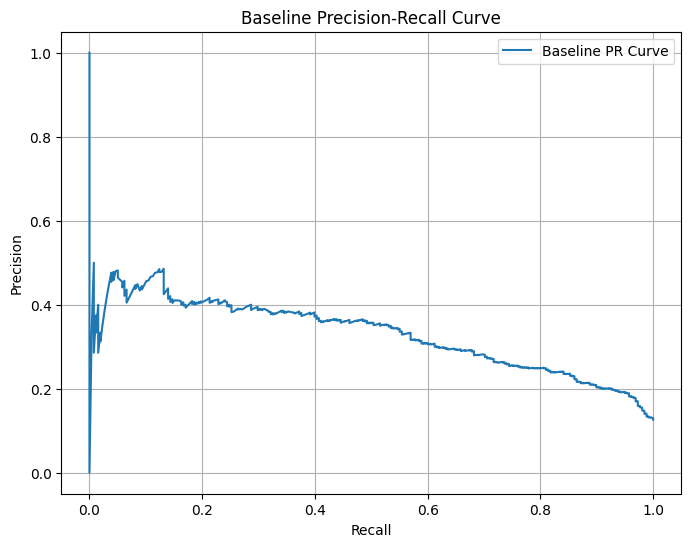

INFO:src.model.train:Baseline Model & dist saved.


Baseline F1: 0.423, AUC: 0.794
Baseline distributions saved for drift ref.


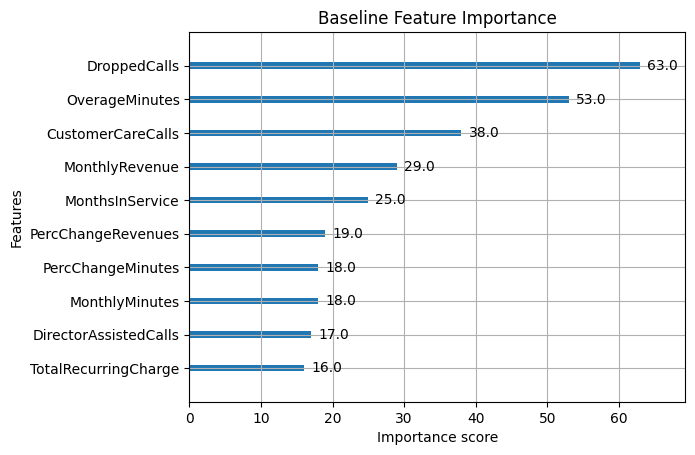

In [2]:
# Train (calls src/model/train.py)
from src.model.train import train_model

# Call with path and name (baseline on batch_0)
results = train_model('data/batches/batch_0.csv', 'baseline')
best_model = results['model']
baseline_dist = results['dist']
f1_base = results['f1']
auc_base = results['auc']

print(f"Baseline F1: {f1_base:.3f}, AUC: {auc_base:.3f}")
print("Baseline distributions saved for drift ref.")

# Quick eval plot (feature importance)
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(best_model, max_num_features=10)
plt.title("Baseline Feature Importance")
plt.show()